In [21]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
os.chdir('/scratch/projects/forestcare/repos/tree_segmentation/')

In [3]:
font_size = 30

In [4]:

data_dir = './data/maps/'

def load_data(data_dir, cnt = 3):
# all directories in data_dir
    dirs = [os.path.join(data_dir, d) for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
    # take the first cnt files in each directory
    files = []
    for d in dirs:
        cur_files = [os.path.join(d, f) for f in os.listdir(d) if int(f.split('-')[-1].split('.res')[0]) <= cnt]
        cur_files.sort()
        files += cur_files
    return files

In [7]:
dataset_files = load_data(data_dir, 3)
print(dataset_files)

['./data/maps/syn-mono-sparse/syn-mono-sparse-1.res', './data/maps/syn-mono-sparse/syn-mono-sparse-2.res', './data/maps/syn-mono-sparse/syn-mono-sparse-3.res', './data/maps/syn-mono-dense/syn-mono-dense-1.res', './data/maps/syn-mono-dense/syn-mono-dense-2.res', './data/maps/syn-mono-dense/syn-mono-dense-3.res', './data/maps/syn-mono-thick/syn-mono-thick-1.res', './data/maps/syn-mono-thick/syn-mono-thick-2.res', './data/maps/syn-mono-thick/syn-mono-thick-3.res', './data/maps/syn-multi-thin/syn-multi-thin-1.res', './data/maps/syn-multi-thin/syn-multi-thin-2.res', './data/maps/syn-multi-thin/syn-multi-thin-3.res', './data/maps/syn-mono-thin/syn-mono-thin-1.res', './data/maps/syn-mono-thin/syn-mono-thin-2.res', './data/maps/syn-mono-thin/syn-mono-thin-3.res', './data/maps/syn-multi-sparse/syn-multi-sparse-1.res', './data/maps/syn-multi-sparse/syn-multi-sparse-2.res', './data/maps/syn-multi-sparse/syn-multi-sparse-3.res', './data/maps/syn-multi-dense/syn-multi-dense-1.res', './data/maps/syn

In [6]:
dfs = []
for f in dataset_files:
        df = pd.read_csv(f, sep="\t+", skiprows=2, engine="python")
        dfs.append(df)

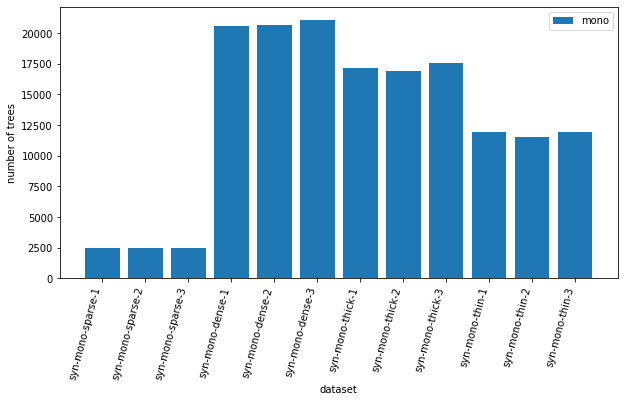

In [7]:
# plot number of trees in each dataset
plt.figure(figsize=(10, 5))
mono_df_files = [df_file for df_file in dataset_files if df_file.split('-')[1] == 'mono']
mono_dfs = [df for df, df_file in zip(dfs, dataset_files) if df_file.split('-')[1] == 'mono']
plt.bar([df_file.split('/')[-1].split('.')[0] for df_file in mono_df_files], [len(df) for df in mono_dfs], label='mono')
# anchor
plt.xticks(rotation=75, ha='right')
plt.xlabel('dataset')
plt.ylabel('number of trees')

plt.legend()
plt.show()


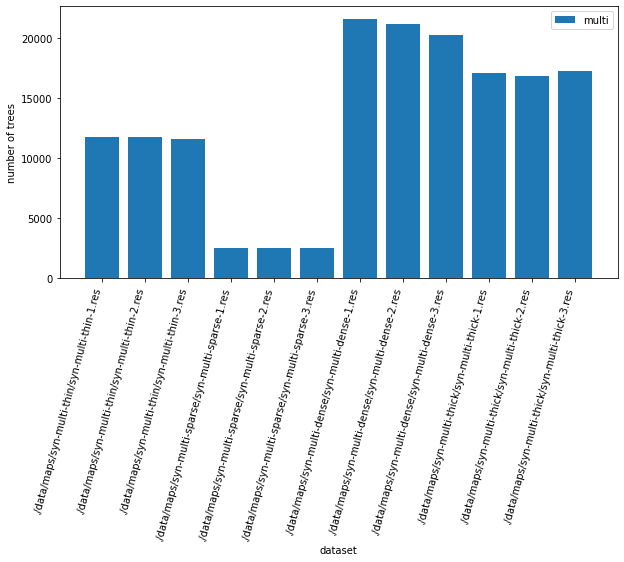

In [8]:
# plot number of trees in each dataset
plt.figure(figsize=(10, 5))
mono_df_files = [df_file for df_file in dataset_files if df_file.split('-')[1] == 'multi']
mono_dfs = [df for df, df_file in zip(dfs, dataset_files) if df_file.split('-')[1] == 'multi']
plt.bar([df_file for df_file in mono_df_files], [len(df) for df in mono_dfs], label='multi')
# anchor
plt.xticks(rotation=75, ha='right')
plt.xlabel('dataset')
plt.ylabel('number of trees')
plt.legend()
plt.show()


In [75]:
# calculate basal areas
for d in dfs:
    d["BA"] = (d["D"] / 2) ** 2 * 3.14159
    d["forest_density"] = d["BA"].sum() / 10000
    d["forest_basal_area"] = d["BA"].sum()
# calculate basal area
# basal_areas = (diameter / 2) ** 2 * 3.14159
# forest_area = 1000 * 1000
# # calculate density
# forest_basal_area = basal_areas.sum()
# # density to m^2/ha
# forest_density = forest_basal_area / forest_area * 10000
# # calculate SDI
# sdi = len(diameter) * forest_density ** 2 / forest_basal_area

In [12]:
dataset_files

['./data/maps/syn-mono-sparse/syn-mono-sparse-1.res',
 './data/maps/syn-mono-sparse/syn-mono-sparse-2.res',
 './data/maps/syn-mono-sparse/syn-mono-sparse-3.res',
 './data/maps/syn-mono-dense/syn-mono-dense-1.res',
 './data/maps/syn-mono-dense/syn-mono-dense-2.res',
 './data/maps/syn-mono-dense/syn-mono-dense-3.res',
 './data/maps/syn-mono-thick/syn-mono-thick-1.res',
 './data/maps/syn-mono-thick/syn-mono-thick-2.res',
 './data/maps/syn-mono-thick/syn-mono-thick-3.res',
 './data/maps/syn-multi-thin/syn-multi-thin-1.res',
 './data/maps/syn-multi-thin/syn-multi-thin-2.res',
 './data/maps/syn-multi-thin/syn-multi-thin-3.res',
 './data/maps/syn-mono-thin/syn-mono-thin-1.res',
 './data/maps/syn-mono-thin/syn-mono-thin-2.res',
 './data/maps/syn-mono-thin/syn-mono-thin-3.res',
 './data/maps/syn-multi-sparse/syn-multi-sparse-1.res',
 './data/maps/syn-multi-sparse/syn-multi-sparse-2.res',
 './data/maps/syn-multi-sparse/syn-multi-sparse-3.res',
 './data/maps/syn-multi-dense/syn-multi-dense-1.res'

In [15]:
df["Grp"]

0        2
1        2
2        1
3        7
4        2
        ..
11744    2
11745    1
11746    3
11747    6
11748    3
Name: Grp, Length: 11749, dtype: int64

In [39]:
df["Grp"].value_counts()

2    3123
3    2111
6    1448
1    1410
4    1115
5    1063
7     791
8     688
Name: Grp, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


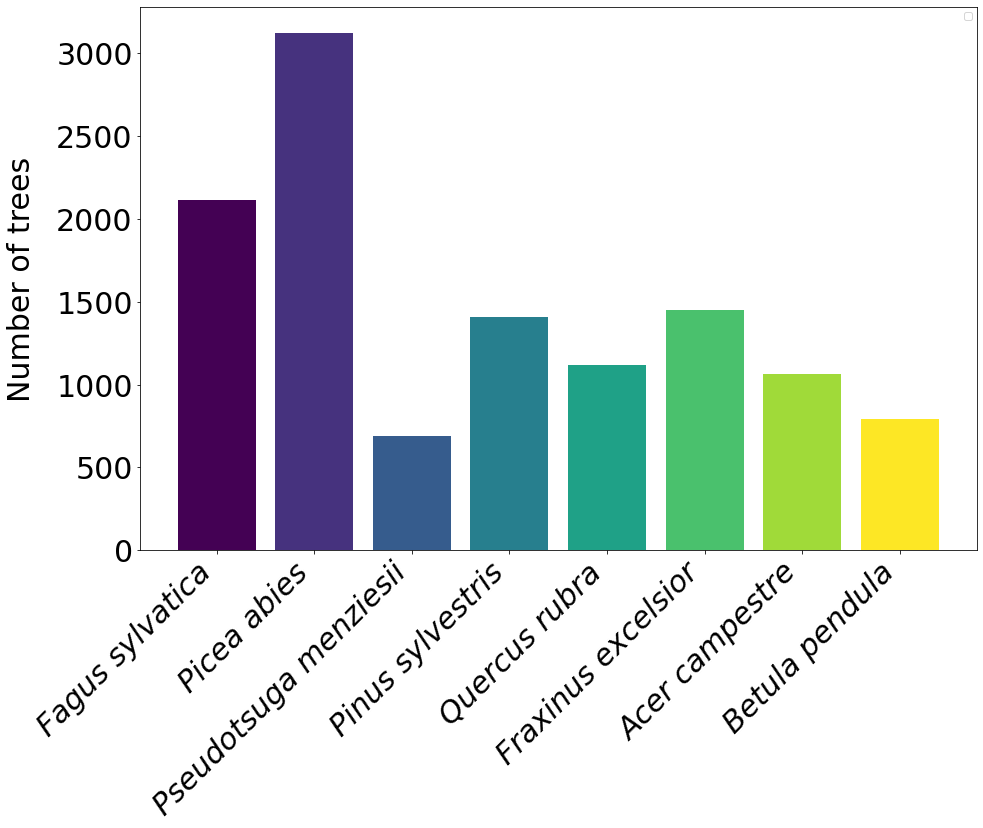

In [8]:
plt.figure(figsize=(15,10))
# plot distribution of species in dfs[9]
df = dfs[9]
#\textit{Pinus sylvestris}, \textit{Picea abies}, \textit{Fagus sylvatica}, \textit{Quercus rubra}, \textit{Acer campestre}, \textit{Fraxinus excelsior}, \textit{Betula pendula}, \textit{"Pseudotsuga menziesii}
species_names = ["Pinus sylvestris", "Picea abies", "Fagus sylvatica", "Quercus rubra", "Acer campestre", "Fraxinus excelsior", "Betula pendula", "Pseudotsuga menziesii"]
# colors in viridis
species_cnts = df["Grp"].value_counts()
species_cnts = [species_cnts[i+1] for i in range(len(species_cnts))]
# rearrange to [Fagus sylvatica, Picea abies, Pseudotsuga menziesii, Pinus sylvestris, Quercus rubra, Fraxinus excelsior, Acer campestre, Betula pendula]
species_cnts = [species_cnts[2], species_cnts[1], species_cnts[7], species_cnts[0], species_cnts[3], species_cnts[5], species_cnts[4], species_cnts[6]]
species_names = [species_names[2], species_names[1], species_names[7], species_names[0], species_names[3], species_names[5], species_names[4], species_names[6]]

color_levels = plt.cm.viridis(np.linspace(0, 1, len(species_names)))
colors = [color_levels[i] for i in range(len(species_names))]
plt.bar(species_names, species_cnts, color=colors)
# anchor
plt.xticks(rotation=45, ha='right')
# add space
plt.ylabel('Number of trees', fontsize=30, labelpad=20)
plt.yticks(fontsize=30)
# italicize species names
plt.xticks(fontsize=30)
for tick in plt.gca().get_xticklabels():
    tick.set_fontstyle("italic")
plt.legend()
plt.show()

In [14]:
multi_df_files = [df_file for df_file in dataset_files if df_file.split('-')[1] == 'multi']
multi_dfs = [df for df, df_file in zip(dfs, dataset_files) if df_file.split('-')[1] == 'multi']

In [57]:
# get heights for each species

species_names = ["Pinus sylvestris", "Picea abies", "Fagus sylvatica", "Quercus rubra", "Acer campestre", "Fraxinus excelsior", "Betula pendula", "Pseudotsuga menziesii"]
species_heights = [[] for i in range(len(species_names))]
for df in multi_dfs:
    for i in range(len(species_names)):
        species_heights[i] += list(df[df["Grp"] == i+1]["H"])

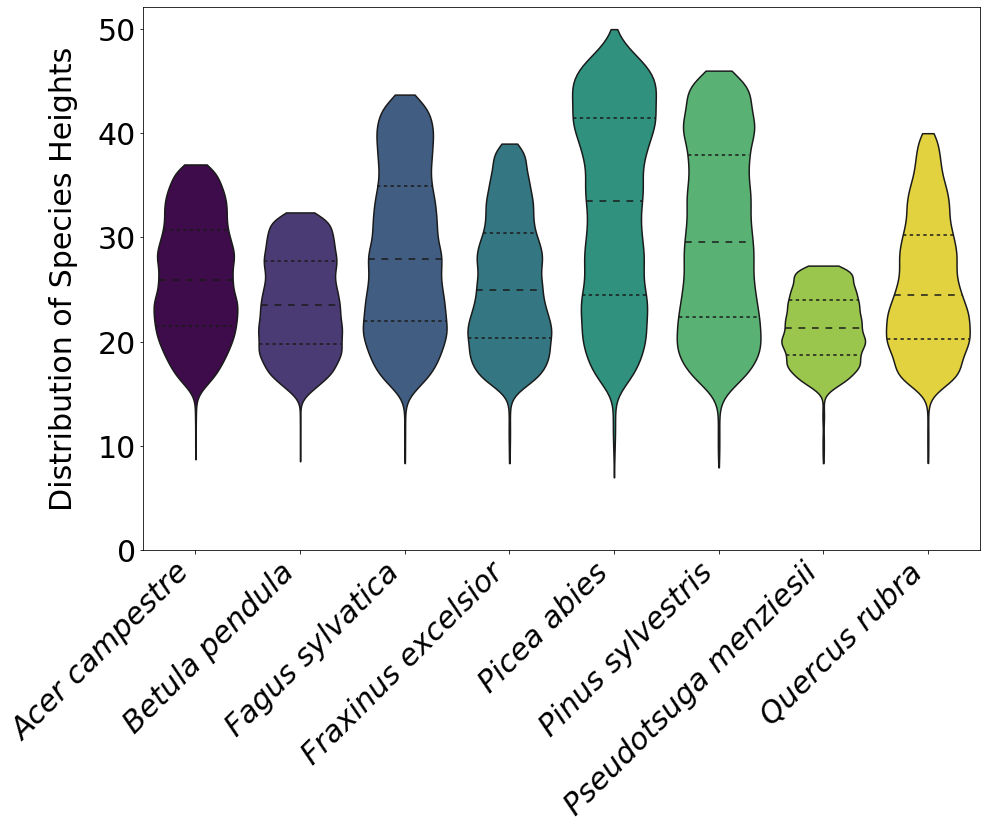

In [58]:
# plot tree heights
plt.figure(figsize=(15,10))

# reorder to [Acer campestre, Betula pendula, Fagus sylvatica, Fraxinus excelsior, Picea abies, Pinus sylvestris, Pseudotsuga menziesii, Quercus rubra]
reorder = [4, 6, 2, 5, 1, 0, 7, 3]
species_heights = [species_heights[i] for i in reorder]
species_names = [species_names[i] for i in reorder]

# different colors for various qualities
colors = plt.cm.viridis(np.linspace(0,1,8))


# unique_species_sc = [scientific_names[s] for s in unique_species]
# colors = plt.cm.viridis(np.linspace(0,1,len(unique_species)))
sns.violinplot(species_heights, palette=colors, inner='quartile', scale='width', cut=0)
# plt.xticks(range(0, len(unique_species)), unique_species_sc, rotation=45, fontstyle='italic', ha='right', fontsize=font_size)
plt.xticks(range(0, len(species_names)), species_names, rotation=45, fontstyle='italic', ha='right', fontsize=font_size)

# font size for y axis
plt.yticks(range(0, 60, 10), fontsize=font_size)
# plot y axis and add some space to the left
plt.ylabel('Distribution of Species Heights', fontsize=font_size, labelpad=20)

plt.show()


In [59]:
# get dbh for each species

species_names = ["Pinus sylvestris", "Picea abies", "Fagus sylvatica", "Quercus rubra", "Acer campestre", "Fraxinus excelsior", "Betula pendula", "Pseudotsuga menziesii"]
species_dbh = [[] for i in range(len(species_names))]
for df in multi_dfs:
    for i in range(len(species_names)):
        cur = df[df["Grp"] == i+1]["D"]*100
        # remove above 100 cm
        cur = cur[cur < 100]
        species_dbh[i] += list(cur)

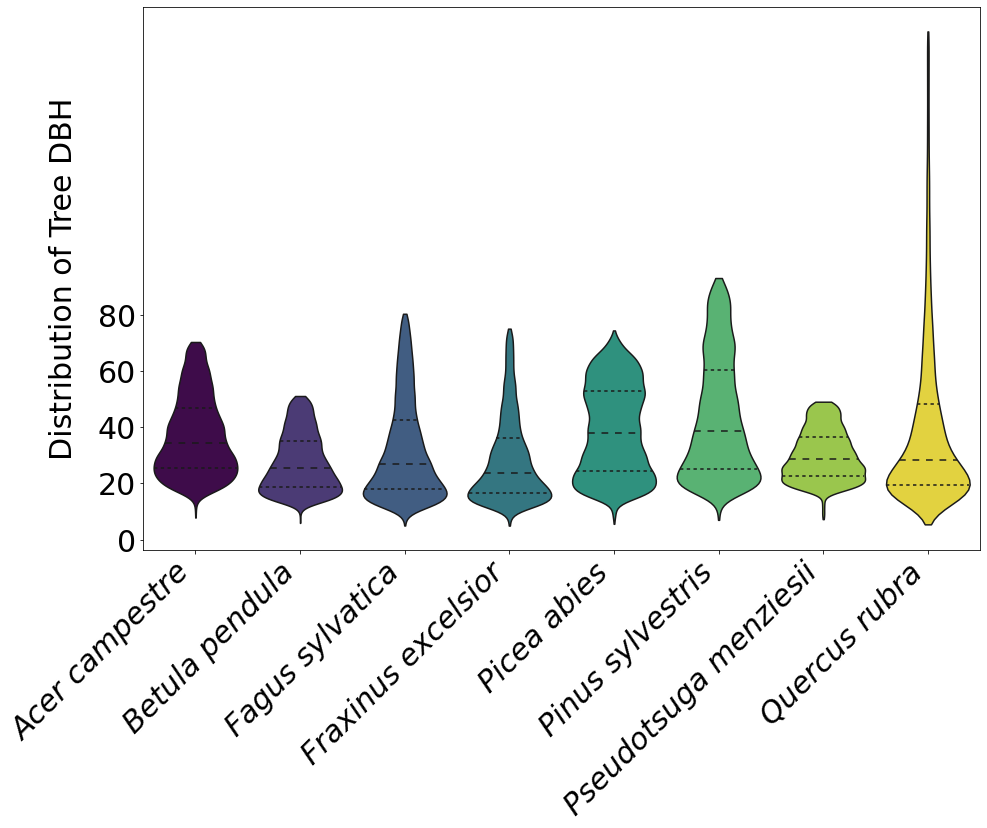

In [60]:
# plot tree dbh
plt.figure(figsize=(15,10))

# reorder to [Acer campestre, Betula pendula, Fagus sylvatica, Fraxinus excelsior, Picea abies, Pinus sylvestris, Pseudotsuga menziesii, Quercus rubra]
reorder = [4, 6, 2, 5, 1, 0, 7, 3]
species_dbh = [species_dbh[i] for i in reorder]
species_names = [species_names[i] for i in reorder]

# different colors for various qualities
colors = plt.cm.viridis(np.linspace(0,1,8))


# unique_species_sc = [scientific_names[s] for s in unique_species]
# colors = plt.cm.viridis(np.linspace(0,1,len(unique_species)))
sns.violinplot(species_dbh, palette=colors, inner='quartile', scale='width', cut=0)
# plt.xticks(range(0, len(unique_species)), unique_species_sc, rotation=45, fontstyle='italic', ha='right', fontsize=font_size)
plt.xticks(range(0, len(species_names)), species_names, rotation=45, fontstyle='italic', ha='right', fontsize=font_size)

# font size for y axis
plt.yticks(range(0, 100, 20), fontsize=font_size)
# plot y axis and add some space to the left
plt.ylabel('Distribution of Tree DBH', fontsize=font_size, labelpad=20)

plt.show()


In [82]:
# plot number of trees in each dataset
plt.figure(figsize=(20, 10))
mono_df_files = [df_file for df_file in dataset_files if df_file.split('-')[1] == 'mono']
mono_dfs = [df for df, df_file in zip(dfs, dataset_files) if df_file.split('-')[1] == 'mono']
density_levels  = [d.split('-')[2].split('/')[0] for d in mono_df_files]
print(set(density_levels))

mono_df_files_sorted = []
mono_dfs_sorted = []

for density_level in ['sparse', 'thin', 'thick', 'dense']:
    for i, df_file in enumerate(mono_df_files):
        if df_file.split('-')[2].split('/')[0] == density_level:
            mono_df_files_sorted.append(df_file)
            mono_dfs_sorted.append(mono_dfs[i])

mono_df_files = mono_df_files_sorted
mono_dfs = mono_dfs_sorted
# assign viridis colors to density levels
color_levels = plt.cm.viridis([i / len(set(density_levels)) for i in range(len(set(density_levels)))])
colors = [color_levels[list(set(density_levels)).index(d.split('-')[2].split('/')[0])] for d in mono_df_files]
# plot forest density but colors are density levels for each dataset
plt.bar([df_file.split('/')[-1].split('.')[0] for df_file in mono_df_files], [df["forest_density"].values[0] for df in mono_dfs], color=colors)

plt.xticks(rotation=45, fontstyle='italic', ha='right', fontsize=22)
plt.ylabel('forest density', fontsize=fontsize)
# font size for y axis
plt.yticks(fontsize=fontsize)

# add legend for density levels
for i, d in enumerate(set(density_levels)):
    plt.bar(0, 0, color=color_levels[i], label=d)
plt.legend(fontsize=fontsize)

plt.show()


{'thick', 'sparse', 'thin', 'dense'}


KeyError: 'forest_density'

<Figure size 1440x720 with 0 Axes>

{'thin', 'dense', 'sparse', 'thick'}


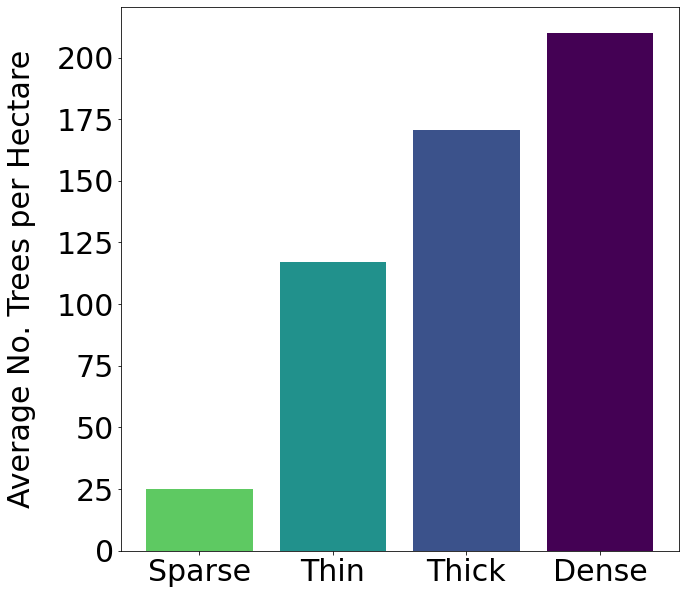

In [42]:
# plot number of trees in each dataset
plt.figure(figsize=(10, 10))
multi_df_files = [df_file for df_file in dataset_files if df_file.split('-')[1] == 'multi']
multi_dfs = [df for df, df_file in zip(dfs, dataset_files) if df_file.split('-')[1] == 'multi']
density_levels  = [d.split('-')[2].split('/')[0] for d in multi_df_files]
print(set(density_levels))

multi_df_files_sorted = []
multi_dfs_sorted = []

for density_level in ['sparse', 'thin', 'thick', 'dense']:
    for i, df_file in enumerate(multi_df_files):
        if df_file.split('-')[2].split('/')[0] == density_level:
            multi_df_files_sorted.append(df_file)
            multi_dfs_sorted.append(multi_dfs[i])

multi_df_files = multi_df_files_sorted
multi_dfs = multi_dfs_sorted

# plot forest density but colors are density levels for each dataset
# plt.bar([df_file.split('/')[-1].split('.')[0] for df_file in multi_df_files], [df["forest_density"].values[0] for df in multi_dfs], color=colors)

for df_file, df in zip(multi_df_files, multi_dfs):
    df["forest_density"] = len(df) / 100
# plot as boxplot

sparse_densities = [df["forest_density"].values[0] for df_file, df in zip(multi_df_files, multi_dfs) if df_file.split('-')[2].split('/')[0] == 'sparse']
thin_densities = [df["forest_density"].values[0] for df_file, df in zip(multi_df_files, multi_dfs) if df_file.split('-')[2].split('/')[0] == 'thin']
thick_densities = [df["forest_density"].values[0] for df_file, df in zip(multi_df_files, multi_dfs) if df_file.split('-')[2].split('/')[0] == 'thick']
dense_densities = [df["forest_density"].values[0] for df_file, df in zip(multi_df_files, multi_dfs) if df_file.split('-')[2].split('/')[0] == 'dense']

# assign viridis colors to density levels
colors = plt.cm.viridis((0, 0.25, 0.5, 0.75))
#reverse
colors = colors[::-1]
# boxplot
#plt.boxplot([sparse_densities, thin_densities, thick_densities, dense_densities], labels=['sparse', 'thin', 'thick', 'dense'])

# plot average density
plt.bar(['Sparse', 'Thin', 'Thick', 'Dense'], [np.mean(sparse_densities), np.mean(thin_densities), np.mean(thick_densities), np.mean(dense_densities)], color=colors)

plt.xticks(fontsize=font_size)
# add space for x ticks
plt.ylabel('Average No. Trees per Hectare', fontsize=font_size, labelpad=20)
# font size for y axis
plt.yticks(fontsize=font_size)

# add legend for density levels in order
for i, d in enumerate(set(density_levels)):
    plt.bar(0, 0, color=color_levels[i], label=d, width=0.1)

plt.show()


{'thin', 'dense', 'sparse', 'thick'}


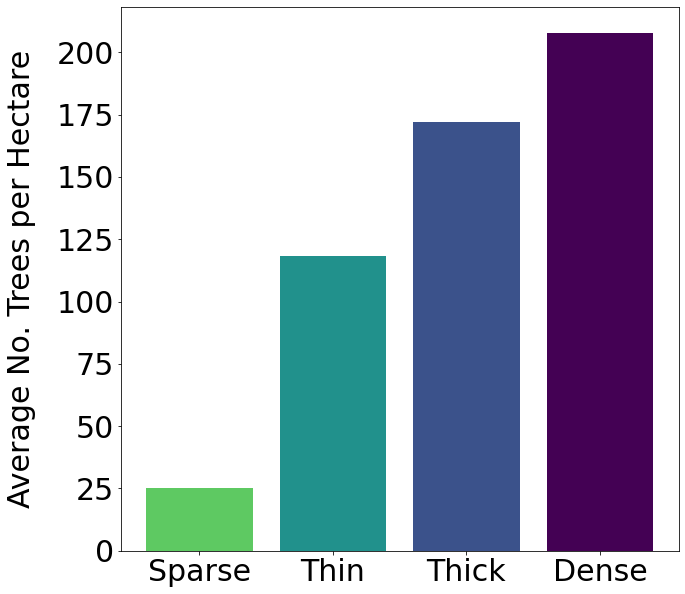

In [41]:
# plot number of trees in each dataset
plt.figure(figsize=(10, 10))
multi_df_files = [df_file for df_file in dataset_files if df_file.split('-')[1] == 'mono']
multi_dfs = [df for df, df_file in zip(dfs, dataset_files) if df_file.split('-')[1] == 'mono']
density_levels  = [d.split('-')[2].split('/')[0] for d in multi_df_files]
print(set(density_levels))

multi_df_files_sorted = []
multi_dfs_sorted = []

for density_level in ['sparse', 'thin', 'thick', 'dense']:
    for i, df_file in enumerate(multi_df_files):
        if df_file.split('-')[2].split('/')[0] == density_level:
            multi_df_files_sorted.append(df_file)
            multi_dfs_sorted.append(multi_dfs[i])

multi_df_files = multi_df_files_sorted
multi_dfs = multi_dfs_sorted

# plot forest density but colors are density levels for each dataset
# plt.bar([df_file.split('/')[-1].split('.')[0] for df_file in multi_df_files], [df["forest_density"].values[0] for df in multi_dfs], color=colors)

for df_file, df in zip(multi_df_files, multi_dfs):
    df["forest_density"] = len(df) / 100
# plot as boxplot

sparse_densities = [df["forest_density"].values[0] for df_file, df in zip(multi_df_files, multi_dfs) if df_file.split('-')[2].split('/')[0] == 'sparse']
thin_densities = [df["forest_density"].values[0] for df_file, df in zip(multi_df_files, multi_dfs) if df_file.split('-')[2].split('/')[0] == 'thin']
thick_densities = [df["forest_density"].values[0] for df_file, df in zip(multi_df_files, multi_dfs) if df_file.split('-')[2].split('/')[0] == 'thick']
dense_densities = [df["forest_density"].values[0] for df_file, df in zip(multi_df_files, multi_dfs) if df_file.split('-')[2].split('/')[0] == 'dense']

# assign viridis colors to density levels
colors = plt.cm.viridis((0, 0.25, 0.5, 0.75))
#reverse
colors = colors[::-1]
# boxplot
#plt.boxplot([sparse_densities, thin_densities, thick_densities, dense_densities], labels=['sparse', 'thin', 'thick', 'dense'])

# plot average density
plt.bar(['Sparse', 'Thin', 'Thick', 'Dense'], [np.mean(sparse_densities), np.mean(thin_densities), np.mean(thick_densities), np.mean(dense_densities)], color=colors)

plt.xticks(fontsize=font_size)
# add space for x ticks
plt.ylabel('Average No. Trees per Hectare', fontsize=font_size, labelpad=20)
# font size for y axis
plt.yticks(fontsize=font_size)

# add legend for density levels in order
for i, d in enumerate(set(density_levels)):
    plt.bar(0, 0, color=color_levels[i], label=d, width=0.1)

plt.show()


{'thin', 'dense', 'sparse', 'thick'}


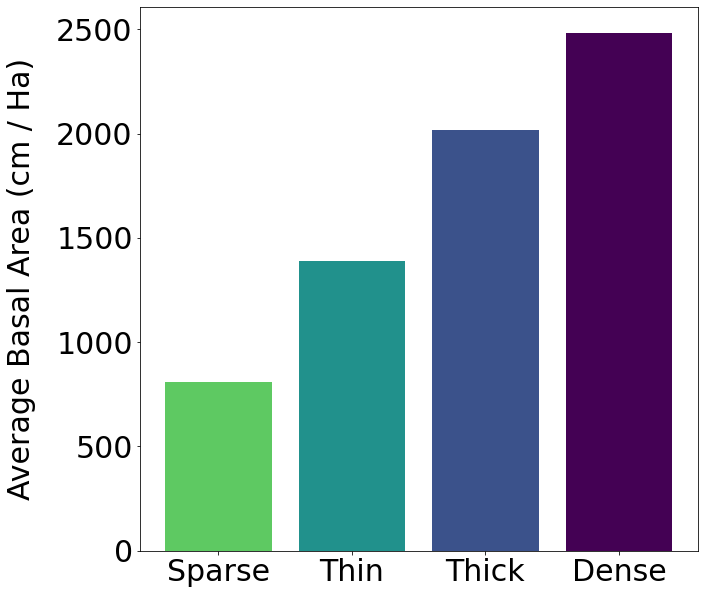

In [40]:
# plot number of trees in each dataset
plt.figure(figsize=(10, 10))
multi_df_files = [df_file for df_file in dataset_files if df_file.split('-')[1] == 'multi']
multi_dfs = [df for df, df_file in zip(dfs, dataset_files) if df_file.split('-')[1] == 'multi']
density_levels  = [d.split('-')[2].split('/')[0] for d in multi_df_files]
print(set(density_levels))

multi_df_files_sorted = []
multi_dfs_sorted = []

for density_level in ['sparse', 'thin', 'thick', 'dense']:
    for i, df_file in enumerate(multi_df_files):
        if df_file.split('-')[2].split('/')[0] == density_level:
            multi_df_files_sorted.append(df_file)
            multi_dfs_sorted.append(multi_dfs[i])

multi_df_files = multi_df_files_sorted
multi_dfs = multi_dfs_sorted

# plot forest density but colors are density levels for each dataset
# plt.bar([df_file.split('/')[-1].split('.')[0] for df_file in multi_df_files], [df["forest_density"].values[0] for df in multi_dfs], color=colors)

for df_file, df in zip(multi_df_files, multi_dfs):
    diameter = df["D"]*100
    basal_areas = (diameter / 2) ** 2 * 3.14159
    df["forest_density"] = basal_areas.sum() / 10000
# plot as boxplot

sparse_densities = [df["forest_density"].values[0] for df_file, df in zip(multi_df_files, multi_dfs) if df_file.split('-')[2].split('/')[0] == 'sparse']
thin_densities = [df["forest_density"].values[0] for df_file, df in zip(multi_df_files, multi_dfs) if df_file.split('-')[2].split('/')[0] == 'thin']
thick_densities = [df["forest_density"].values[0] for df_file, df in zip(multi_df_files, multi_dfs) if df_file.split('-')[2].split('/')[0] == 'thick']
dense_densities = [df["forest_density"].values[0] for df_file, df in zip(multi_df_files, multi_dfs) if df_file.split('-')[2].split('/')[0] == 'dense']

# assign viridis colors to density levels
colors = plt.cm.viridis((0, 0.25, 0.5, 0.75))
#reverse
colors = colors[::-1]
# boxplot
#plt.boxplot([sparse_densities, thin_densities, thick_densities, dense_densities], labels=['sparse', 'thin', 'thick', 'dense'])

# plot average density
plt.bar(['Sparse', 'Thin', 'Thick', 'Dense'], [np.mean(sparse_densities), np.mean(thin_densities), np.mean(thick_densities), np.mean(dense_densities)], color=colors)

plt.xticks(fontsize=font_size)
# add space for x ticks
plt.ylabel('Average Basal Area (cm / Ha)', fontsize=font_size, labelpad=20)
# font size for y axis
plt.yticks(fontsize=font_size)

# add legend for density levels in order
for i, d in enumerate(set(density_levels)):
    plt.bar(0, 0, color=color_levels[i], label=d, width=0.1)

plt.show()


{'thin', 'dense', 'sparse', 'thick'}


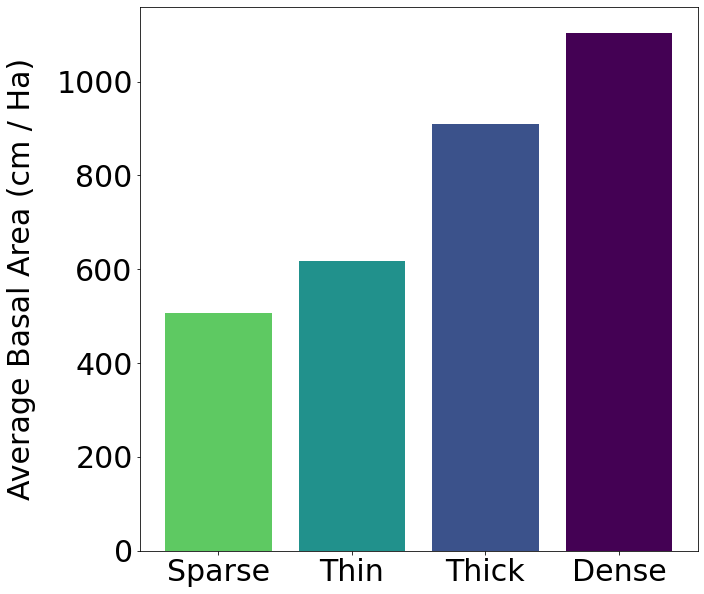

In [39]:
# plot number of trees in each dataset
plt.figure(figsize=(10, 10))
multi_df_files = [df_file for df_file in dataset_files if df_file.split('-')[1] == 'mono']
multi_dfs = [df for df, df_file in zip(dfs, dataset_files) if df_file.split('-')[1] == 'mono']
density_levels  = [d.split('-')[2].split('/')[0] for d in multi_df_files]
print(set(density_levels))

multi_df_files_sorted = []
multi_dfs_sorted = []

for density_level in ['sparse', 'thin', 'thick', 'dense']:
    for i, df_file in enumerate(multi_df_files):
        if df_file.split('-')[2].split('/')[0] == density_level:
            multi_df_files_sorted.append(df_file)
            multi_dfs_sorted.append(multi_dfs[i])

multi_df_files = multi_df_files_sorted
multi_dfs = multi_dfs_sorted

# plot forest density but colors are density levels for each dataset
# plt.bar([df_file.split('/')[-1].split('.')[0] for df_file in multi_df_files], [df["forest_density"].values[0] for df in multi_dfs], color=colors)

for df_file, df in zip(multi_df_files, multi_dfs):
    diameter = df["D"]*100
    basal_areas = (diameter / 2) ** 2 * 3.14159
    df["forest_density"] = basal_areas.sum() / 10000
# plot as boxplot

sparse_densities = [df["forest_density"].values[0] for df_file, df in zip(multi_df_files, multi_dfs) if df_file.split('-')[2].split('/')[0] == 'sparse']
thin_densities = [df["forest_density"].values[0] for df_file, df in zip(multi_df_files, multi_dfs) if df_file.split('-')[2].split('/')[0] == 'thin']
thick_densities = [df["forest_density"].values[0] for df_file, df in zip(multi_df_files, multi_dfs) if df_file.split('-')[2].split('/')[0] == 'thick']
dense_densities = [df["forest_density"].values[0] for df_file, df in zip(multi_df_files, multi_dfs) if df_file.split('-')[2].split('/')[0] == 'dense']

# assign viridis colors to density levels
colors = plt.cm.viridis((0, 0.25, 0.5, 0.75))
#reverse
colors = colors[::-1]
# boxplot
#plt.boxplot([sparse_densities, thin_densities, thick_densities, dense_densities], labels=['sparse', 'thin', 'thick', 'dense'])

# plot average density
plt.bar(['Sparse', 'Thin', 'Thick', 'Dense'], [np.mean(sparse_densities), np.mean(thin_densities), np.mean(thick_densities), np.mean(dense_densities)], color=colors)

plt.xticks(fontsize=font_size)
# add space for x ticks
plt.ylabel('Average Basal Area (cm / Ha)', fontsize=font_size, labelpad=20)
# font size for y axis
plt.yticks(fontsize=font_size)

# add legend for density levels in order
for i, d in enumerate(set(density_levels)):
    plt.bar(0, 0, color=color_levels[i], label=d, width=0.1)

plt.show()


In [26]:
mono_point_cnts =[[186875890, 187216943, 187007963],
[244691426 ,246506305 ,245409172],
[285009984, 285918313, 284889767],
[300974550, 300897537 ,299855227]]
mono_points_order = ['sparse', 'thin', 'thick', 'dense']

{'thin', 'dense', 'sparse', 'thick'}


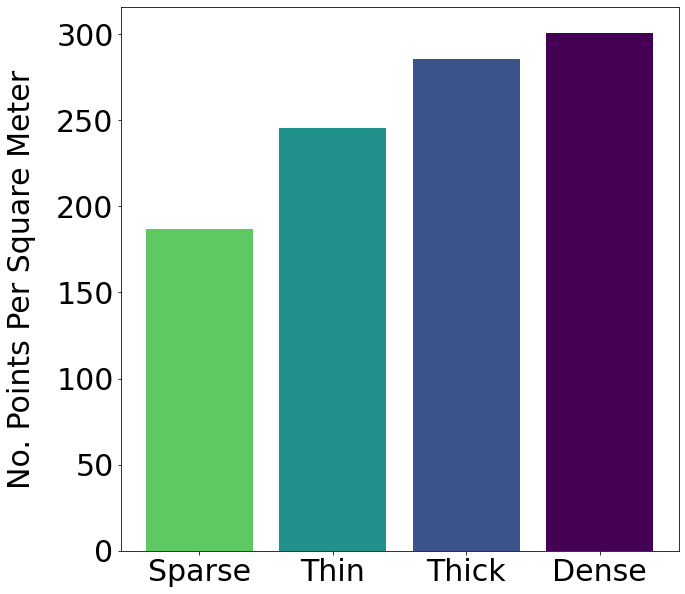

In [38]:
# plot number of points
plt.figure(figsize=(10, 10))
multi_df_files = [df_file for df_file in dataset_files if df_file.split('-')[1] == 'mono']
multi_dfs = [df for df, df_file in zip(dfs, dataset_files) if df_file.split('-')[1] == 'mono']
density_levels  = [d.split('-')[2].split('/')[0] for d in multi_df_files]
print(set(density_levels))

multi_df_files_sorted = []
multi_dfs_sorted = []

for density_level in ['sparse', 'thin', 'thick', 'dense']:
    for i, df_file in enumerate(multi_df_files):
        if df_file.split('-')[2].split('/')[0] == density_level:
            multi_df_files_sorted.append(df_file)
            multi_dfs_sorted.append(multi_dfs[i])

multi_df_files = multi_df_files_sorted
multi_dfs = multi_dfs_sorted

# plot forest density but colors are density levels for each dataset
# plt.bar([df_file.split('/')[-1].split('.')[0] for df_file in multi_df_files], [df["forest_density"].values[0] for df in multi_dfs], color=colors)

# plot as boxplot

sparse_densities = [m/1000000 for m in mono_point_cnts[0]]
thin_densities = [m/1000000 for m in mono_point_cnts[1]]
thick_densities = [m/1000000 for m in mono_point_cnts[2]]
dense_densities = [m/1000000 for m in mono_point_cnts[3]]

# assign viridis colors to density levels
colors = plt.cm.viridis((0, 0.25, 0.5, 0.75))
#reverse
colors = colors[::-1]
# boxplot
#plt.boxplot([sparse_densities, thin_densities, thick_densities, dense_densities], labels=['sparse', 'thin', 'thick', 'dense'])

# plot average density
plt.bar(['Sparse', 'Thin', 'Thick', 'Dense'], [np.mean(sparse_densities), np.mean(thin_densities), np.mean(thick_densities), np.mean(dense_densities)], color=colors)

plt.xticks(fontsize=font_size)
# add space for x ticks
plt.ylabel('No. Points Per Square Meter', fontsize=font_size, labelpad=20)
# font size for y axis
plt.yticks(fontsize=font_size)

# add legend for density levels in order
for i, d in enumerate(set(density_levels)):
    plt.bar(0, 0, color=color_levels[i], label=d, width=0.1)

plt.show()


In [34]:
multi_point_cnts = [[142476863,143068392,144329263],
[246486336,245303705,245156896],
[280010122, 279165941, 283144244],
[297408422, 297588714, 295170951]]
multi_points_order = ['sparse', 'thin', 'thick', 'dense']

{'thin', 'dense', 'sparse', 'thick'}


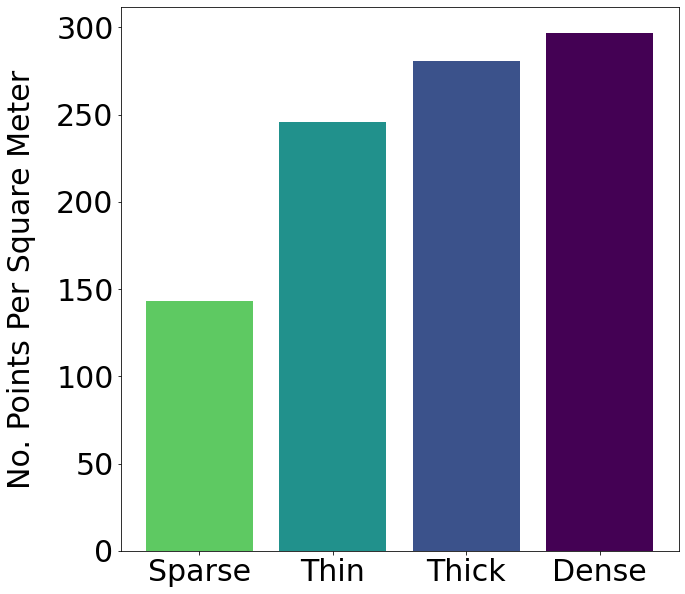

In [37]:
# plot number of points
plt.figure(figsize=(10, 10))
multi_df_files = [df_file for df_file in dataset_files if df_file.split('-')[1] == 'multi']
multi_dfs = [df for df, df_file in zip(dfs, dataset_files) if df_file.split('-')[1] == 'multi']
density_levels  = [d.split('-')[2].split('/')[0] for d in multi_df_files]
print(set(density_levels))

multi_df_files_sorted = []
multi_dfs_sorted = []

for density_level in ['sparse', 'thin', 'thick', 'dense']:
    for i, df_file in enumerate(multi_df_files):
        if df_file.split('-')[2].split('/')[0] == density_level:
            multi_df_files_sorted.append(df_file)
            multi_dfs_sorted.append(multi_dfs[i])

multi_df_files = multi_df_files_sorted
multi_dfs = multi_dfs_sorted

# plot forest density but colors are density levels for each dataset
# plt.bar([df_file.split('/')[-1].split('.')[0] for df_file in multi_df_files], [df["forest_density"].values[0] for df in multi_dfs], color=colors)

# plot as boxplot

sparse_densities = [m/1000000 for m in multi_point_cnts[0]]
thin_densities = [m/1000000 for m in multi_point_cnts[1]]
thick_densities = [m/1000000 for m in multi_point_cnts[2]]
dense_densities = [m/1000000 for m in multi_point_cnts[3]]

# assign viridis colors to density levels
colors = plt.cm.viridis((0, 0.25, 0.5, 0.75))
#reverse
colors = colors[::-1]
# boxplot
#plt.boxplot([sparse_densities, thin_densities, thick_densities, dense_densities], labels=['sparse', 'thin', 'thick', 'dense'])

# plot average density
plt.bar(['Sparse', 'Thin', 'Thick', 'Dense'], [np.mean(sparse_densities), np.mean(thin_densities), np.mean(thick_densities), np.mean(dense_densities)], color=colors)

plt.xticks(fontsize=font_size)
# add space for x ticks
plt.ylabel('No. Points Per Square Meter', fontsize=font_size, labelpad=20)
# font size for y axis
plt.yticks(fontsize=font_size)

# add legend for density levels in order
for i, d in enumerate(set(density_levels)):
    plt.bar(0, 0, color=color_levels[i], label=d, width=0.1)

plt.show()
